## Student Success Prediction - Exploratory Data Analysis
**Dataset:** UCI Student Dropout and Academic Success

**Goal:** Understand the data to build a classifier predicting student outcomes

## Imports 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Jupyter settings
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries imported.")

Libraries imported.


## Load Data

In [38]:
# Load from local CSV
df = pd.read_csv('../data/data.csv', sep=';')

print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst 5 rows: ")
df.head()


Dataset loaded: 4424 rows × 37 columns

Column names:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Variable Encoding Reference

**Key binary variables (0/1):**
- **Gender:** 0=Female, 1=Male
- **Daytime/evening attendance:** 0=Evening, 1=Daytime
- **Displaced:** 0=No, 1=Yes
- **Debtor:** 0=No, 1=Yes
- **Tuition fees up to date:** 0=No, 1=Yes
- **Scholarship holder:** 0=No, 1=Yes
- **Educational special needs:** 0=No, 1=Yes
- **International:** 0=No, 1=Yes

**Marital Status:**
1=Single, 2=Married, 3=Widower, 4=Divorced, 5=Facto union, 6=Legally separated

**Target Variable:**
- Dropout
- Enrolled
- Graduate

*Full variable descriptions available on website*

## Data Structure & Quality

In [40]:
# Dataset overview

print("DATASET OVERVIEW")
print("=" * 80)
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns) - 1}")

print("\n" + "=" * 80)
print("DATA TYPES:")
print("=" * 80)
print(df.dtypes)

DATASET OVERVIEW
Number of samples: 4424
Number of features: 36

DATA TYPES:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              i

In [41]:
# Check for missing values
print("MISSING VALUES:")
print("=" * 80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values!")
else:
    print("Columns with missing values:")
    print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n✓ Duplicate rows: {duplicates}")

MISSING VALUES:
✓ No missing values!

✓ Duplicate rows: 0


In [42]:
# Summary statistics for numerical features
print("SUMMARY STATISTICS:")
print("=" * 80)
df.describe()

SUMMARY STATISTICS:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Target Variable Analysis

Understanding the distribution of outcomes (Dropout, Enrolled, Graduate) is critical for classification.

Why this matters: If one class dominates (like 90% graduates), our model might just predict "Graduate" for everyone and look accurate but be useless!

In [43]:
# Target variable distribution
target_counts = df['Target'].value_counts()
target_pct = df['Target'].value_counts(normalize=True) * 100

print("TARGET VARIABLE DISTRIBUTION:")
print("=" * 80)
for outcome in target_counts.index:
    count = target_counts[outcome]
    pct = target_pct[outcome]
    print(f"{outcome:15} {count:5} ({pct:5.2f}%)")

# Check class imbalance
print("\n⚠️  CLASS IMBALANCE CHECK:")
if target_pct.max() > 60:
    print(f"Warning: Majority class is {target_pct.max():.1f}% - may need  class balancing")
else:
    print("✓ Classes are reasonably balanced")



TARGET VARIABLE DISTRIBUTION:
Graduate         2209 (49.93%)
Dropout          1421 (32.12%)
Enrolled          794 (17.95%)

⚠️  CLASS IMBALANCE CHECK:
✓ Classes are reasonably balanced


/var/folders/_h/5cscz3ms2119yhvf6653y08h0000gn/T/ipykernel_34564/2016632206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='viridis', ax=axes[0])


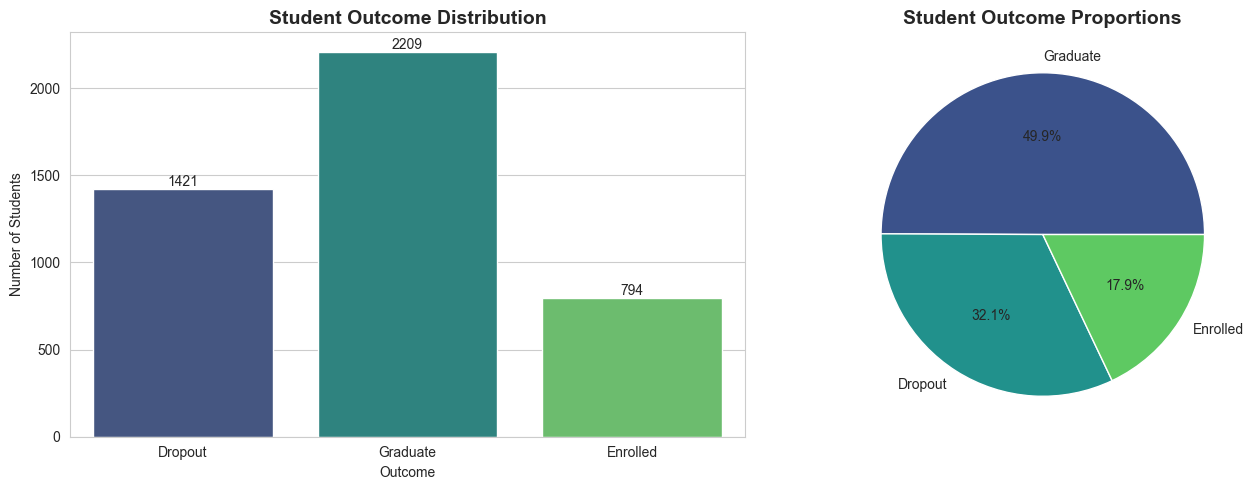

In [45]:
# Visualization 1: Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.countplot(data=df, x='Target', palette='viridis', ax=axes[0])
axes[0].set_title('Student Outcome Distribution', fontsize=14,
fontweight='bold')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Number of Students')
# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('viridis', len(target_counts)))
axes[1].set_title('Student Outcome Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Academic Performance Analysis

Explore how grades differ between outcomes

/var/folders/_h/5cscz3ms2119yhvf6653y08h0000gn/T/ipykernel_34564/4024047273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)', palette='viridis', ax=axes[0])
/var/folders/_h/5cscz3ms2119yhvf6653y08h0000gn/T/ipykernel_34564/4024047273.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', palette='viridis', ax=axes[1])


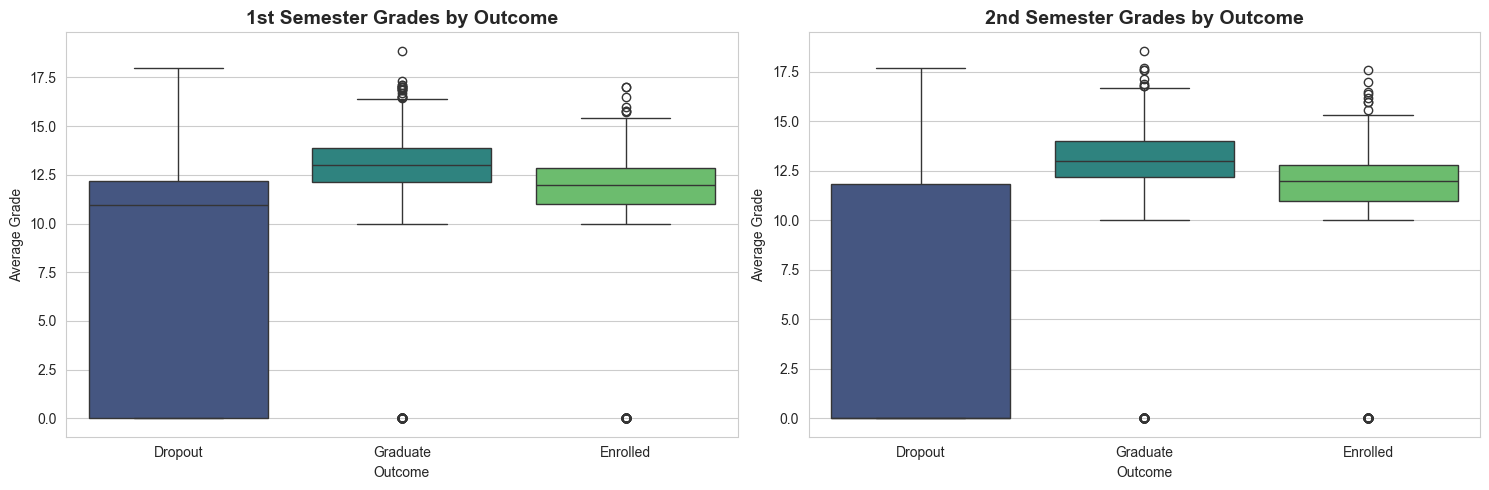

In [49]:
# Visualization 2: Academic performance by outcome
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st semester grades
sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)', palette='viridis', ax=axes[0])
axes[0].set_title('1st Semester Grades by Outcome', fontsize=14,
fontweight='bold')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Average Grade')

# 2nd semester grades
sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', palette='viridis', ax=axes[1])
axes[1].set_title('2nd Semester Grades by Outcome', fontsize=14,
fontweight='bold')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Average Grade')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical breakdown
print("GRADE STATISTICS BY OUTCOME:")
print("=" * 80)
print("\n1st Semester Grades:")
print(df.groupby('Target')['Curricular units 1st sem (grade)'].describe()[['mean', 'std', 'min', 'max']])

print("\n2nd Semester Grades:")
print(df.groupby('Target')['Curricular units 2nd sem (grade)'].describe()[['mean', 'std', 'min', 'max']])

GRADE STATISTICS BY OUTCOME:

1st Semester Grades:
               mean       std  min     max
Target                                    
Dropout    7.256656  6.031120  0.0  18.000
Enrolled  11.125257  3.675084  0.0  17.000
Graduate  12.643655  2.699027  0.0  18.875

2nd Semester Grades:
               mean       std  min        max
Target                                       
Dropout    5.899339  6.118740  0.0  17.714286
Enrolled  11.117364  3.601240  0.0  17.600000
Graduate  12.697276  2.685608  0.0  18.571429


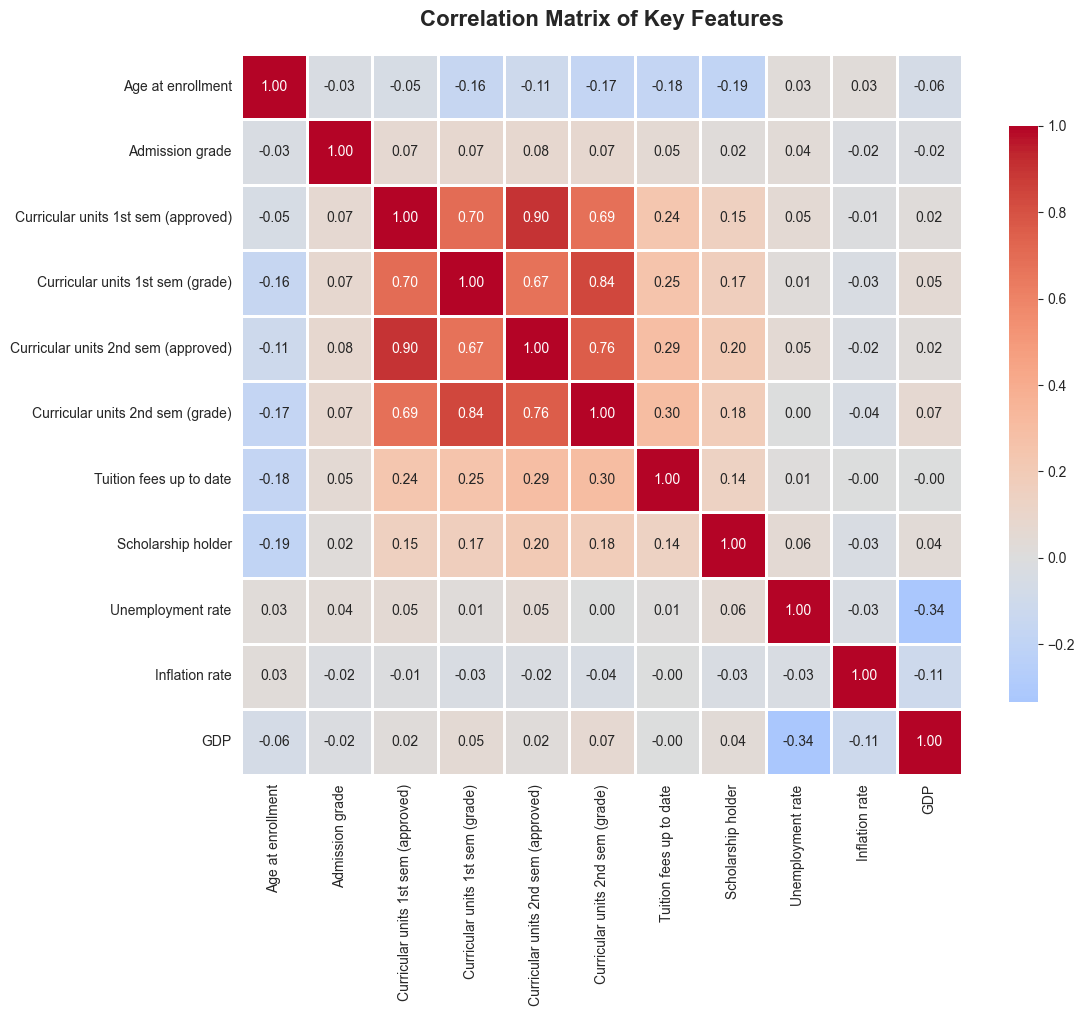


STRONG CORRELATIONS (|r| > 0.7):
Curricular units 1st sem (approved) ↔ Curricular units 2nd sem (approved): 0.904
Curricular units 1st sem (grade) ↔ Curricular units 2nd sem (grade): 0.837
Curricular units 2nd sem (approved) ↔ Curricular units 2nd sem (grade): 0.761


In [51]:
 # Visualization 3: Correlation heatmap of key numerical features
key_features = [
    'Age at enrollment',
    'Admission grade',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Tuition fees up to date',
    'Scholarship holder',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

correlation_matrix = df[key_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Features', fontsize=16,fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\nSTRONG CORRELATIONS (|r| > 0.7):")
print("=" * 80)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## Key Insights & Initial Findings

In [56]:
# Key findings summary
print("KEY FINDINGS:")
print("=" * 80)

# 1. Grade performance gap
dropout_avg = df[df['Target'] == 'Dropout']['Curricular units 1st sem (grade)'].mean() 
grad_avg = df[df['Target'] == 'Graduate']['Curricular units 1st sem (grade)'].mean()
print(f"\n1. ACADEMIC PERFORMANCE GAP:")
print(f"   Graduates: {grad_avg:.2f} average grade (1st sem)")
print(f"   Dropouts: {dropout_avg:.2f} average grade (1st sem)")
print(f"   Gap: {grad_avg - dropout_avg:.2f} points")

# 2. Grade trends matter
dropout_decline = df[df['Target'] == 'Dropout']['Curricular units 2nd sem (grade)'].mean() - dropout_avg
grad_improve = df[df['Target'] == 'Graduate']['Curricular units 2nd sem (grade)'].mean() - grad_avg
print(f"\n2. GRADE TRENDS (1st to 2nd semester):")
print(f"   Graduates: {grad_improve:+.2f} (improving)")
print(f"   Dropouts: {dropout_decline:+.2f} (declining)")

# 3. Class size
print(f"\n3. CLASS DISTRIBUTION:")
print(f"   Graduates: {len(df[df['Target'] == 'Graduate'])} (49.9%)")
print(f"   Dropouts: {len(df[df['Target'] == 'Dropout'])} (32.1%)")
print(f"   Enrolled: {len(df[df['Target'] == 'Enrolled'])} (18.0%)")
print(f"   Note: 'Enrolled' class is smaller - may be harder to predict")

# 4. Feature correlation
print(f"\n4. FEATURE REDUNDANCY:")
print(f"   'Approved units' and 'Grade' are highly correlated (r > 0.84)")
print(f"   May need feature selection to avoid multicollinearity")

KEY FINDINGS:

1. ACADEMIC PERFORMANCE GAP:
   Graduates: 12.64 average grade (1st sem)
   Dropouts: 7.26 average grade (1st sem)
   Gap: 5.39 points

2. GRADE TRENDS (1st to 2nd semester):
   Graduates: +0.05 (improving)
   Dropouts: -1.36 (declining)

3. CLASS DISTRIBUTION:
   Graduates: 2209 (49.9%)
   Dropouts: 1421 (32.1%)
   Enrolled: 794 (18.0%)
   Note: 'Enrolled' class is smaller - may be harder to predict

4. FEATURE REDUNDANCY:
   'Approved units' and 'Grade' are highly correlated (r > 0.84)
   May need feature selection to avoid multicollinearity


## 6. Anticipated Challenges & Next Steps

### Challenges Identified:
1. **Class imbalance:** "Enrolled" class is underrepresented (18%) - may
need SMOTE or class weights
2. **Feature correlation:** Grade-related features highly correlated -
consider feature selection
3. **Encoded categories:** Many categorical variables need proper encoding
(one-hot vs ordinal)
4. **Economic indicators:** Time-series nature - may need temporal feature
engineering

### Potential Feature Engineering:
- **Grade trend:** 2nd semester grade - 1st semester grade (captures
improvement/decline)
- **Success rate:** Approved units / Enrolled units ratio per semester
- **Early warning flag:** Binary indicator for 1st semester grade < 10
- **Parent education combined:** Average of mother's + father's education
level

### Open Questions for Model Building:
1. Should we treat economic indicators differently (time-based)?
2. Which encoding strategy for categorical variables?
3. Should we create interaction features (e.g., age × scholarship)?
4. How to handle the grade=0 cases (students who didn't take exams)?